<a href="https://colab.research.google.com/github/Francisroyce/Francisroyce/blob/main/end_to_end_image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install --upgrade pip
!pip install --upgrade setuptools


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tensorflow opencv-python matplotlib


In [4]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
anyio                         3.6.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
array-record                  0.2.0
arviz                         0.15.1
astropy                       5.2.2
astunparse                    1.6.3
attrs                         23.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
beautifulsoup4                4.11.2
bleach                        6.0.0
blis                          0.7.9
blosc2                        2.0.0
bokeh                         2.4.3
branca                        0.6.0
build                         0.10.0
CacheControl                  0.12.11
cac

In [5]:
import tensorflow as tf
import os

In [13]:
# avoid OOM (out of memory error)errors by setting GPU memory consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [28]:
gpus = tf.config.experimental.list_physical_devices('GPU')
len(gpus)

1

In [73]:
import cv2
import imghdr
from matplotlib import pyplot as plt
import numpy as np

In [61]:
data_dir = '/content/drive/MyDrive/data'

In [62]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']
image_exts

['jpeg', 'jpg', 'bmp', 'png']

# Remove Dodgy images

In [ ]:
os.listdir(os.path.join(data_dir, 'happy'))

In [ ]:
os.listdir(os.path.join(data_dir, 'sad'))

In [ ]:
for image_class in os.listdir(data_dir):
   for image in os.listdir(os.path.join(data_dir, image_class)):
    print(image)


In [66]:
img = cv2.imread(os.path.join('/content/drive/MyDrive/data/happy/05-12-21-happy-people.jpg'))

In [67]:
img.shape

(880, 1400, 3)

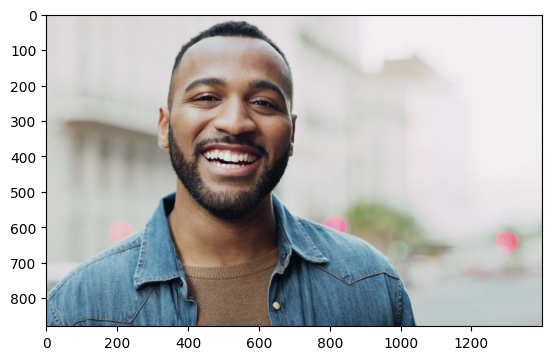

In [68]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

In [69]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))


Image not in ext list /content/drive/MyDrive/data/happy/56f455011e0000b300705475.jpeg
Image not in ext list /content/drive/MyDrive/data/happy/2560px-Happy_People.jpg
Image not in ext list /content/drive/MyDrive/data/happy/220px-Happy_People_A_Year_in_the_Taiga_poster.jpg
Image not in ext list /content/drive/MyDrive/data/happy/Happy20People.jpg
Image not in ext list /content/drive/MyDrive/data/happy/guilherme-stecanella-375176-unsplash.jpg
Image not in ext list /content/drive/MyDrive/data/sad/very-sad-man-sitting-alone-on-white-background-depressed-young-man-sitting-businessman-vector.jpg
Image not in ext list /content/drive/MyDrive/data/sad/portrait-sad-man-260nw-126009806.jpg
Image not in ext list /content/drive/MyDrive/data/sad/depressed-senior-man-looking-unhappy-260nw-1326693131.jpg
Image not in ext list /content/drive/MyDrive/data/sad/depressed-man-studio-shot-260nw-404652526.jpg
Image not in ext list /content/drive/MyDrive/data/sad/african-american-depressive-sad-broken-260nw-475

In [70]:
len('/content/drive/MyDrive/data/happy')

33

In [71]:
len('/content/drive/MyDrive/data/sad')

31

# Load Data

In [74]:
tf.data.Dataset??

In [78]:
import tensorflow as tf

dataset = tf.keras.utils.image_dataset_from_directory??


In [79]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/data')


Found 103 files belonging to 2 classes.


In [80]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [81]:
data_iterator = data.as_numpy_iterator()

In [82]:
data_iterator

In [93]:
# get another batch from the iterator
batch = data_iterator.next()

In [94]:
batch

(array([[[[3.31015625e+01, 3.51015625e+01, 3.41015625e+01],
          [3.76093750e+01, 3.96093750e+01, 3.86093750e+01],
          [3.85859375e+01, 4.05859375e+01, 3.95859375e+01],
          ...,
          [5.10859375e+01, 5.30859375e+01, 5.20859375e+01],
          [5.73750000e+01, 5.93750000e+01, 5.83750000e+01],
          [3.44921875e+01, 3.64921875e+01, 3.54921875e+01]],
 
         [[3.94765625e+01, 4.14765625e+01, 4.04765625e+01],
          [3.77421875e+01, 3.97421875e+01, 3.87421875e+01],
          [3.87578125e+01, 4.07578125e+01, 3.97578125e+01],
          ...,
          [3.25703125e+01, 3.45703125e+01, 3.35703125e+01],
          [3.31562500e+01, 3.51562500e+01, 3.41562500e+01],
          [3.88671875e+01, 4.08671875e+01, 3.98671875e+01]],
 
         [[4.28984375e+01, 4.48984375e+01, 4.38984375e+01],
          [4.42421875e+01, 4.62421875e+01, 4.52421875e+01],
          [4.36562500e+01, 4.56562500e+01, 4.46562500e+01],
          ...,
          [3.65468750e+01, 3.85468750e+01, 3.7546

In [95]:
len(batch)

2

In [96]:
batch[0]

array([[[[3.31015625e+01, 3.51015625e+01, 3.41015625e+01],
         [3.76093750e+01, 3.96093750e+01, 3.86093750e+01],
         [3.85859375e+01, 4.05859375e+01, 3.95859375e+01],
         ...,
         [5.10859375e+01, 5.30859375e+01, 5.20859375e+01],
         [5.73750000e+01, 5.93750000e+01, 5.83750000e+01],
         [3.44921875e+01, 3.64921875e+01, 3.54921875e+01]],

        [[3.94765625e+01, 4.14765625e+01, 4.04765625e+01],
         [3.77421875e+01, 3.97421875e+01, 3.87421875e+01],
         [3.87578125e+01, 4.07578125e+01, 3.97578125e+01],
         ...,
         [3.25703125e+01, 3.45703125e+01, 3.35703125e+01],
         [3.31562500e+01, 3.51562500e+01, 3.41562500e+01],
         [3.88671875e+01, 4.08671875e+01, 3.98671875e+01]],

        [[4.28984375e+01, 4.48984375e+01, 4.38984375e+01],
         [4.42421875e+01, 4.62421875e+01, 4.52421875e+01],
         [4.36562500e+01, 4.56562500e+01, 4.46562500e+01],
         ...,
         [3.65468750e+01, 3.85468750e+01, 3.75468750e+01],
         [

In [97]:
# images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [98]:
# labels
batch[1]

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0], dtype=int32)

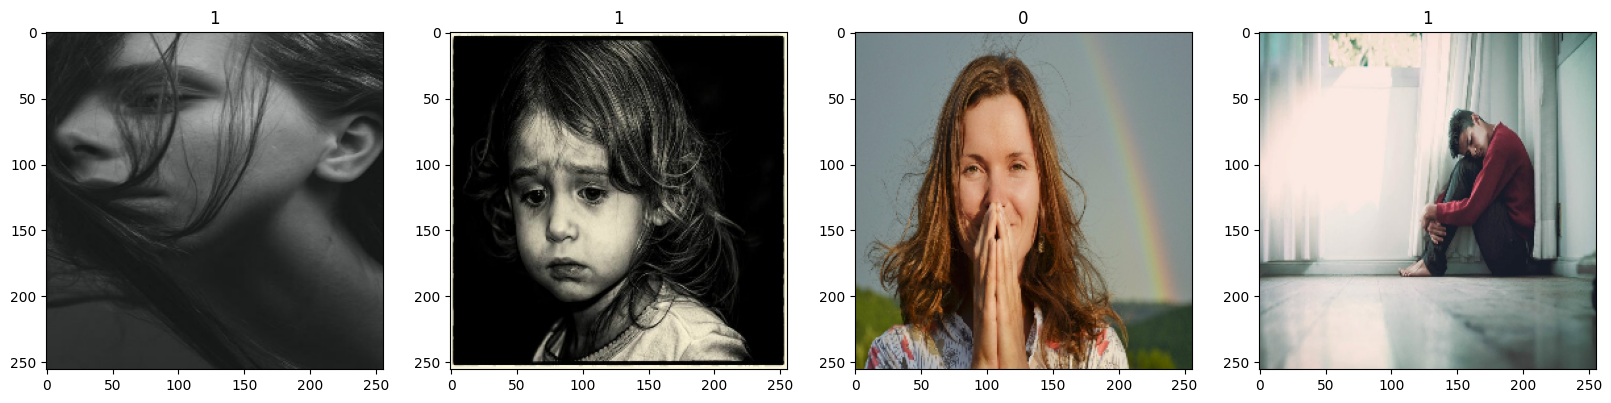

In [100]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].set_title(batch[1][idx])
# from here, you can see class 1 = sad and class 0 = happy